# Necessary library install (uncomment below lines to install)

In [4]:
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install seaborn

## Importing necessary libraries

In [29]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ggplot import *
from functools import reduce 
%matplotlib inline

# Dataset discription
Feature - 83

rows - 41198

# Acquisition

In [3]:
## loading dataset to a variable
vehicles_data = pd.read_csv("dataset/vehicles.csv")
## showing top 6 row of the dataset
vehicles_data.head()
## showing last 6 row of the dataset
# vehicles_data.tail()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


# Exploration and understanding

## Data Description

#### Variable Identification

variable type and description can be found on the headers.names file in the dataset folder.

# Head columns and type

atvtype - type of alternative fuel or advanced technology vehicle

barrels08 - annual petroleum consumption in barrels for fuelType1 (1)

barrelsA08 - annual petroleum consumption in barrels for fuelType2 (1)

charge120 - time to charge an electric vehicle in hours at 120 V 

charge240 - time to charge an electric vehicle in hours at 240 V 

In [3]:
# number of rows # number of columns
# rows, columns
vehicles_data.shape

(41197, 83)

In [6]:
# Column names
column_names = vehicles_data.columns.values
column_names
# Variables and their type info
# vehicles_data.info()

array(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF',
       'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08',
       'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD',
       'combinedUF', 'cylinders', 'displ', 'drive', 'engId', 'eng_dscr',
       'feScore', 'fuelCost08', 'fuelCostA08', 'fuelType', 'fuelType1',
       'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08',
       'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv',
       'id', 'lv2', 'lv4', 'make', 'model', 'mpgData', 'phevBlended',
       'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy',
       'rangeHwyA', 'trany', 'UCity', 'UCityA', 'UHighway', 'UHighwayA',
       'VClass', 'year', 'youSaveSpend', 'guzzler', 'trans_dscr',
       'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'mod

In [7]:
## checking unique, min, max year in the dataset
# len(set(vehicles_data['year'])) # python way
unique_years = vehicles_data['year'].nunique() # pandas way
min_year = vehicles_data['year'].min()
max_year = vehicles_data['year'].max()

# other way
# unique_years = len(pd.unique(vehicles_data.year)) # pandas another way

In [8]:
print("Unique year:", unique_years)
print("Minimum year:", min_year)
print("Maximum year:", max_year)

Unique year: 37
Minimum year: 1984
Maximum year: 2020


In [6]:
# Fuel type would be a important fetaure
# Q what types of fuel are used as the automobiles' primary fuel types
unique_fuel_type_1 = vehicles_data['fuelType1'].nunique()
unique_fuel_type_1

## Their are 6 unique fueltypes

6

In [7]:
vehicles_data['fuelType1'].value_counts()

# Insight : looks like most most cars in the dataset use regular gasoline, 
# and the second most common fuel type is premium gasoline

Regular Gasoline     27861
Premium Gasoline     11784
Diesel                1180
Electricity            206
Midgrade Gasoline      106
Natural Gas             60
Name: fuelType1, dtype: int64

In [8]:
## Separating boolean, numerical and categorical columns.
def separate_data_types_in_df(dataFrame:pd.DataFrame, variable_type:list):
    """
    This function will return boolean or Numeric or Categorical variable from a dataFrame and their length
    
    Arguments: [dataFrame] : A pandas data frame
               [variable_type] : A list of variable types
    example:
        ['float64','float32','int32','int64'] represents Numeric Variable
        ['bool'] represents boolean Varible
        ['object'] represents Categorical Varible
    """
    column_types = [key for key in dict(dataFrame.dtypes)
             if dict(dataFrame.dtypes)[key] in variable_type ]
    
    return column_types, len(column_types)

In [37]:
## Separating boolean, numerical and categorical columns.
# boolean_columns = [key for key in dict(vehicles_data.dtypes)
#              if dict(vehicles_data.dtypes)[key] in ['bool'] ] # boolean Varible

# numeric_columns = [key for key in dict(vehicles_data.dtypes)
#                    if dict(vehicles_data.dtypes)[key]
#                        in ['float64','float32','int32','int64']] # Numeric Variable

# categorical_columns = [key for key in dict(vehicles_data.dtypes)
#              if dict(vehicles_data.dtypes)[key] in ['object'] ] # Categorical Varible

In [9]:
boolean_columns, boolean_columns_length = separate_data_types_in_df(vehicles_data, ['bool'])
numeric_columns, numeric_columns_length = separate_data_types_in_df(vehicles_data, ['float64','float32','int32','int64'])
categorical_columns, categorical_columns_length = separate_data_types_in_df(vehicles_data, ['object'])

In [59]:
print("Boolean columns:")
print(boolean_columns)
print("Numerical columns:")
print(numeric_columns)
print("Categorical columns:")
print(categorical_columns)

Boolean columns:
['phevBlended']
Numerical columns:
['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders', 'displ', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08', 'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA', 'UCity', 'UCityA', 'UHighway', 'UHighwayA', 'year', 'youSaveSpend', 'charge240b', 'phevCity', 'phevHwy', 'phevComb']
Categorical columns:
['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model', 'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 

In [18]:
print(boolean_columns_length)
print(numeric_columns_length)
print(categorical_columns_length)

1
59
23


In [19]:
## Counting missing values in the dataset.
missing_values_freq = vehicles_data[boolean_columns + numeric_columns + categorical_columns].isnull().sum()

In [50]:
missing_values_freq
# Insight : looks like lots of missing values some values are pretty bad like 
# guzzler            38774
# trans_dscr         26150
# tCharger           34287
# sCharger           40351
# atvType            37632
# fuelType2          39589
# rangeA             39594
# evMotor            40341
# mfrCode            30818
# c240Dscr           41113
# c240bDscr          41117
# startStop          31704

# TODO: We have to handle missing value

phevBlended            0
barrels08              0
barrelsA08             0
charge120              0
charge240              0
city08                 0
city08U                0
cityA08                0
cityA08U               0
cityCD                 0
cityE                  0
cityUF                 0
co2                    0
co2A                   0
co2TailpipeAGpm        0
co2TailpipeGpm         0
comb08                 0
comb08U                0
combA08                0
combA08U               0
combE                  0
combinedCD             0
combinedUF             0
cylinders            209
displ                207
engId                  0
feScore                0
fuelCost08             0
fuelCostA08            0
ghgScore               0
                   ...  
UHighwayA              0
year                   0
youSaveSpend           0
charge240b             0
phevCity               0
phevHwy                0
phevComb               0
drive               1189
eng_dscr           16162


# Munging, wrangling, and manipulation

### Types of transmissions used by these automobiles

#### Our main concern Car's transmission is automatic or manual

In [5]:
vehicles_data["trany2"] = vehicles_data["trany"].str[0]

In [6]:
vehicles_data['trany2'].value_counts()

# Insight: There are roughly twice as many automobile models with automatic transmission as there are models with manual transmission

A    28377
M    12809
Name: trany2, dtype: int64

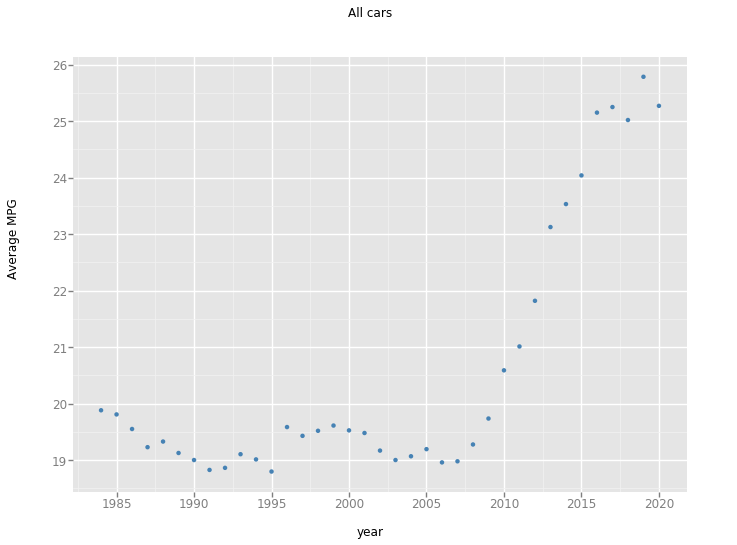

<ggplot: (-9223363296930986005)>

In [13]:
grouped = vehicles_data.groupby("year")
averaged = grouped['comb08', 'highway08','city08'].agg([np.mean])

averaged.columns = ['comb08_mean','highway08_mean','city08_mean'] 
averaged['year'] = averaged.index

ggplot(averaged, aes('year', 'comb08_mean')) + geom_point(color='steelblue') + xlab("year") + ylab("Average MPG") + ggtitle("All cars")

In [16]:
criteria1 = vehicles_data.fuelType1.isin(["Regular Gasoline", "Premium Gasoline", "Midgrade Gasoline"])
criteria2 = vehicles_data.fuelType2.isnull() 
criteria3 = vehicles_data.atvType != "Hybrid" 
vehicles_non_hybrid = vehicles_data[criteria1 & criteria2 & criteria3] 
len(vehicles_non_hybrid)

37550

In [17]:
# the resulting data frame by year and then compute the mean combination fuel efficiency for each year
grouped = vehicles_non_hybrid.groupby(['year']) 
averaged = grouped['comb08'].agg([np.mean]) 
averaged

,mean
year,
1984,19.121622
1985,19.394686
1986,19.320457
1987,19.164568
1988,19.367607
1989,19.141964
1990,19.031459
1991,18.838060
1992,18.861566


In [18]:
pd.unique(vehicles_non_hybrid.displ)

# Insight: For non numeric values, remove all rows from the vehicles_non_hybrid data frame that have nandispl

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6, 5.4,
       5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 4.4, 3.7, 6.7,
       4.8, 1.7, 6.2, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, nan, 6.6, 6.4, 0.9])

In [19]:
criteria = vehicles_non_hybrid.displ.notnull() 
vehicles_non_hybrid = vehicles_non_hybrid[criteria] 
vehicles_non_hybrid.displ = vehicles_non_hybrid.displ.astype('float') 

In [20]:
criteria = vehicles_non_hybrid.comb08.notnull() 
vehicles_non_hybrid = vehicles_non_hybrid[criteria] 
vehicles_non_hybrid.comb08 = vehicles_non_hybrid.comb08.astype('float')

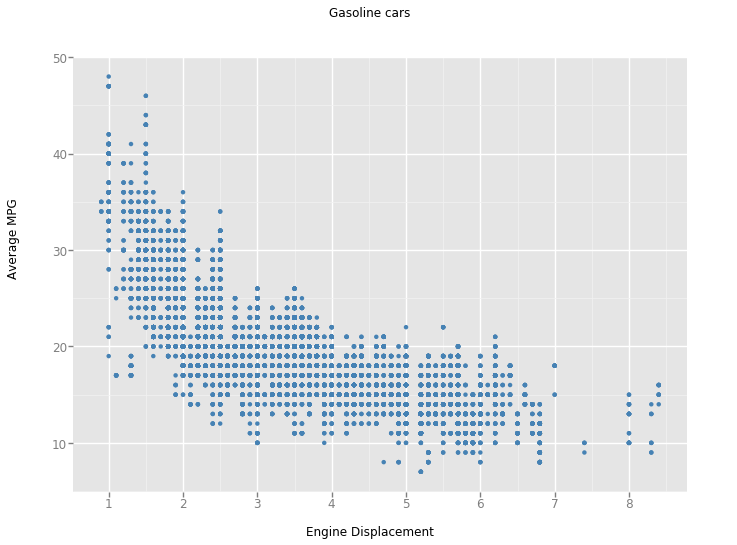

<ggplot: (-9223363296931853515)>

In [21]:
ggplot(vehicles_non_hybrid, aes('displ', 'comb08')) + geom_point(color='steelblue') + xlab("Engine Displacement") +ylab("Average MPG") + ggtitle("Gasoline cars") 

In [ ]:
# Insight: plot seems to confirm a negative relationship between fuel economy and engine displacement

In [22]:
grouped_by_year = vehicles_non_hybrid.groupby(['year'])
avg_grouped_by_year = grouped_by_year['displ', 'comb08'].agg([np.mean])

In [23]:
avg_grouped_by_year['year'] = avg_grouped_by_year.index 
melted_avg_grouped_by_year = pd.melt(avg_grouped_by_year,id_vars='year')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


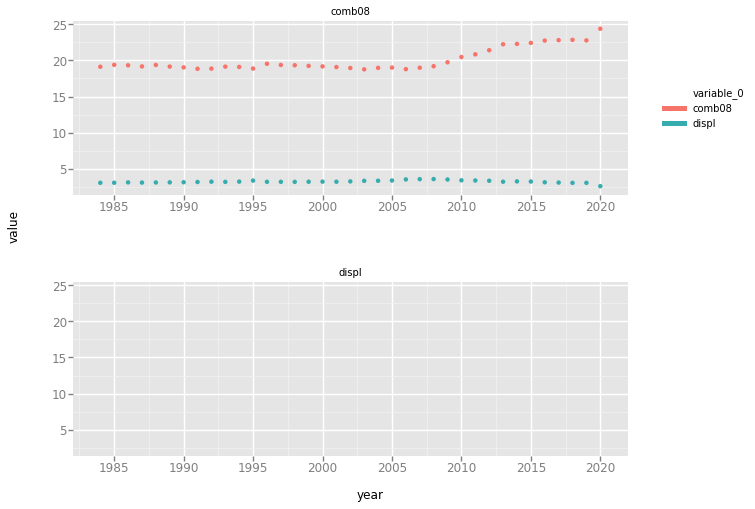

<ggplot: (8739922265976)>

In [24]:
p = ggplot(aes(x='year', y='value', color = 'variable_0'), data=melted_avg_grouped_by_year) 
p + geom_point() + facet_wrap("variable_0")

In [25]:
pd.unique(vehicles_non_hybrid.cylinders) 
#Insight: mixed type variables float and int

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16., nan])

In [26]:
vehicles_non_hybrid.cylinders = vehicles_non_hybrid.cylinders.astype('float') 
pd.unique(vehicles_non_hybrid.cylinders) 

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16., nan])

In [27]:
vehicles_non_hybrid_4 = vehicles_non_hybrid[(vehicles_non_hybrid.cylinders == 4.0)]

AxesSubplot(0.125,0.125;0.775x0.755)


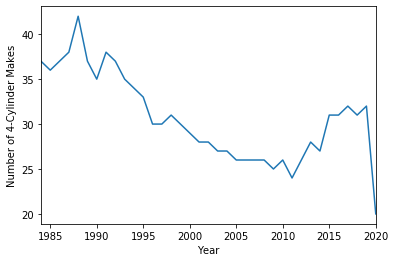

In [28]:
# 4-cylinder cars over the time frame
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year']).make.nunique() 
fig = grouped_by_year_4_cylinder.plot() 
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes') 
print(fig)

# Insight: preceding graph that there has been a decline in the number of makes with 4-cylinder engines available since 1980
# However, as a caveat, this plot could be misleading, as we do not know if the total number of available makes per year has changed over the same period of time.


In [36]:
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year']) 
unique_makes = [] 
for name, group in grouped_by_year_4_cylinder: 
    unique_makes.append(set(pd.unique(group['make'])))

unique_makes = reduce(set.intersection, unique_makes)
print(unique_makes) 

#Insight: there are only 6 manufacturers that made 4-cylinder cars every year during this period

{'Mitsubishi', 'Subaru', 'Toyota', 'Nissan', 'Chevrolet', 'Ford'}


In [39]:
boolean_mask = []
for index, row in vehicles_non_hybrid_4.iterrows(): 
    make = row['make']
    boolean_mask.append(make in unique_makes)
df_common_makes = vehicles_non_hybrid_4[boolean_mask]  
df_common_makes_grouped = df_common_makes.groupby(['year', 'make']).agg(np.mean).reset_index()

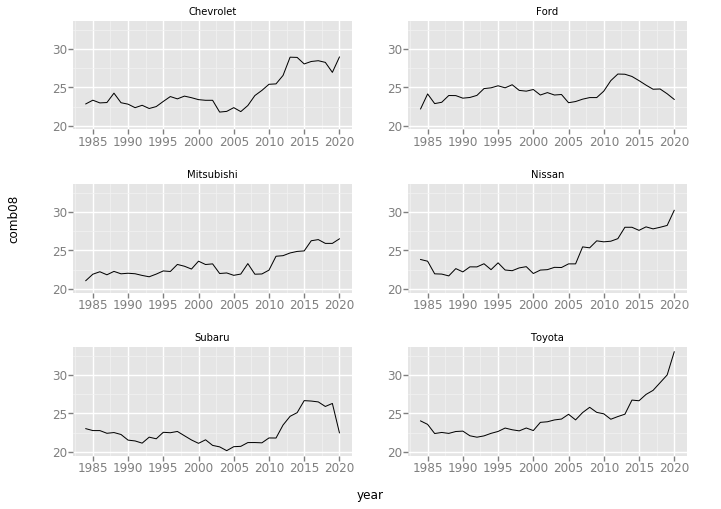

<ggplot: (-9223363296932553384)>

In [40]:
ggplot(aes(x='year', y='comb08'), data = df_common_makes_grouped) + geom_line() + facet_wrap('make')

# Analysis and modeling

# Communication and operationalization